In [2]:
%load_ext autoreload

%autoreload 2

In [1]:
%pylab inline
from numpy import copy
import scipy as sp

from ipywidgets import FloatProgress
from IPython.display import display

import timeit

import fibonacci_heap_mod as fhm

from scipy import sparse

from tqdm import tqdm

from time import sleep
import threading

Populating the interactive namespace from numpy and matplotlib


In [25]:
from numpy.linalg import eig

P = array([[1,2,3],[4,5,6],[7,8,9]])
sorted(eig(P)[0])[1]

-9.7591848298711389e-16

In [15]:
P.

array([[-0.41597356, -0.90937671]])

In [9]:
from numpy.linalg import eig
from numpy.linalg import norm

class ObjectiveGenerator:
    
    def __init__(self, c, q, u, s):
        self.c = c
        self.q = q
        self.u = u
        self.s = s
        self.elems = {"sec_eig": second_eignvalue, "price": price, "power_deviations": power_deviations}
    
    def second_eignvalue(self, P):
        return sorted(eig(P)[0])[1]
    
    def price(self, P):
        return self.c*self.q.dot(P.dot(self.u))
    
    def power_deviations(self, P):
        return (self.q.dot(P.dot(self.u)) - s)**2
    
    def get_objective(self, factors):
        return lambda P: sum([elems[factor](P) for factor in factors])
    
    def se_lagrangian_grad(self, P, Q, Y, rho, w, z):
        v2 = eig(P)[1][:, 1]
        

In [ ]:
def lag_grad_p(P, Q, Y, rho, w, z, pi):
    v2 = eig(P)[1][:, 1]
    last_part = [[rho*pi[j]*(p[j,i]-1) for j in P.shape[1]] for i in P.shape[0]]
    

In [34]:
P = array([[1,2,3],[4,5,6],[7,8,9]])
sorted(zip(*eig(P.T.dot(P))), key=lambda x: x[0], reverse=True)[1][1]

array([-0.57236779, -0.07568647, -0.81649658])

In [35]:
from main import solve
n = 3
c = 1
u = zeros(n).reshape((n, 1))
u[0][0] = 1
s = 1
pi = (ones(n)/n).reshape((n, 1))
q = ones(n).reshape((n, 1))
P, log, converged = solve(c, u, s, pi, q)
print(P, converged)

[[ 0.51391125  0.52294408  0.52058995]
 [ 0.52507391  0.51568576  0.51857715]
 [ 0.52224883  0.51810619  0.51789457]] 111


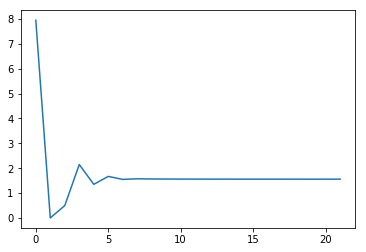

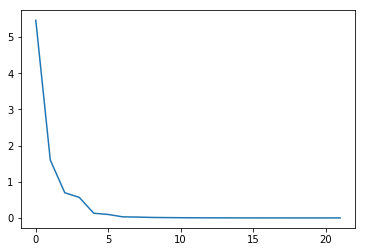

In [39]:
plot(log["P_grad_norm"])
show()
plot(log["P_Q_difference"])